# DESCRIPTION

## Objective: Make a model to predict the app rating, with other information about the app provided.

### Problem Statement:

Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.

### Domain: General

Analysis to be done: The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, is always a great indicator of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

### Fields in the data –

    App: Application name

    Category: Category to which the app belongs 

    Rating: Overall user rating of the app

    Reviews: Number of user reviews for the app

    Size: Size of the app

    Installs: Number of user downloads/installs for the app

    Type: Paid or Free

    Price: Price of the app

    Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult

    Genres: An app can belong to multiple genres (apart from its main category). For example, a musical family game will belong to Music, Game, Family genres.

    Last Updated: Date when the app was last updated on Play Store

    Current Ver: Current version of the app available on Play Store

    Android Ver: Minimum required Android version


In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Steps to perform:

## 1. Load the data file using pandas. 

In [149]:
inp0 = pd.read_csv("googleplaystore.csv")

In [150]:
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [151]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## 2. Check for null values in the data. Get the number of null values for each column.

Dropping the records with null ratings
- this is done because ratings is our target variable

In [152]:
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## 3. Drop records with nulls in any of the columns. 

In [153]:
inp0.shape

(10841, 13)

We have 1474 missing values in Ratings. This means  1474/9353=  16% of Data.  I will Check and fill the missing values with Mode/Median/Mean depends on Distribution Plot 

In [154]:
inp0.Rating.describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

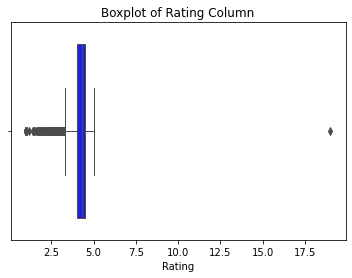

In [155]:
sns.boxplot(x = inp0.Rating ,color='blue', linewidth= 1).set(title = "Boxplot of Rating Column" );
#sns.boxplot(inp0['Rating'])
# It looks like There is ONE  OUTLIER 

Our Rating  should be between 1- 5 .
We need to check How many outliers are there?

In [156]:
inp0[inp0.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [157]:
inp0.drop([10472], inplace=True)

Let's check 10472 Row #

In [158]:
inp0[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


### Filling the missing values depends on Distribution and Histogram

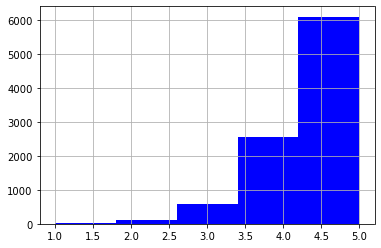

In [159]:
inp0.Rating.hist(bins=5 , color='blue');

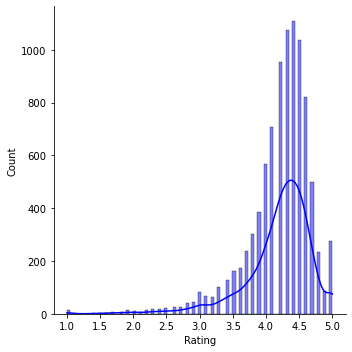

In [160]:
sns.displot(inp0.Rating, kde=True , color='blue')

##### This is Positive Asymetric . And It is better fill the missing values with Median

In [161]:
inp0.Rating.fillna(inp0.Rating.median(), inplace=True )

##### Filling 'Type' with Mode

In [162]:
inp0['Type'].mode()

0    Free
Name: Type, dtype: object

In [163]:
inp0['Type'].fillna(str(inp0['Type'].mode().values[0]),inplace=True )

In [164]:
inp0.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

##### I will already drop the columns ( Last Updated - Current Ver - And Ver )  Please look at *Session 8.2*
##### Now I will drop the rest of the Null / Missing VALUES 

Confirming that the null records have been dropped

In [165]:
inp0.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [166]:
inp0.dropna(how ='any')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### Change variable to correct types

In [167]:
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## 4.	Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 
1.	Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
a.	Extract the numeric value from the column
b.	Multiply the value by 1,000, if size is mentioned in Mb
2.	Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).
3.	Installs field is currently stored as string and has values like 1,000,000+. 
a.	Treat 1,000,000+ as 1,000,000
b.	remove ‘+’, ‘,’ from the field, convert it to integer
4.	Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.


#### 4.1 Handling the app size field

In [168]:
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)
        return(x)
    else:
        return None

In [169]:
change_size("19M")

19000.0

In [170]:
inp0["Size"] = inp0["Size"].map(change_size)

In [171]:
inp0.Size.describe()

count      9145.000000
mean      21516.529524
std       22588.747934
min           8.500000
25%        4900.000000
50%       13000.000000
75%       30000.000000
max      100000.000000
Name: Size, dtype: float64

In [172]:
inp0["Size"].isnull().sum()

1695

In [173]:
#filling Size which had NA
inp0.Size.fillna(method = 'ffill', inplace = True)

#### 4.2 Converting reviews to numeric

In [174]:
inp0.Reviews = inp0.Reviews.astype("int32")

In [175]:
inp0.Reviews.describe()

count    1.084000e+04
mean     4.441529e+05
std      2.927761e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.477550e+04
max      7.815831e+07
Name: Reviews, dtype: float64

#### 4.3 Now, handling the installs column

In [176]:
inp0.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

##### We'll need to remove the commas and the plus signs

Defining function for the same

In [177]:
def clean_installs(val):
    return int(val.replace(",","").replace("+",""))

In [178]:
inp0.Installs = inp0.Installs.map(clean_installs)

In [179]:
inp0.Installs.describe()

count    1.084000e+04
mean     1.546434e+07
std      8.502936e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

#### 4.4 Price column needs to be cleaned

In [180]:
inp0.Price.value_counts()[:5]

0        10040
$0.99      148
$2.99      129
$1.99       73
$4.99       72
Name: Price, dtype: int64

Some have dollars, some have 0
- we need to conditionally handle this
- first, let's modify the column to take 0 if value is 0, else take the first letter onwards

In [181]:
def clean_price(size):
    if size == '0':
        size = 0
        return(size)
    else:
        return float(size[1:])
                    
inp0['Price'] = inp0.Price.map(clean_price)

In [182]:
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## 5. Some sanity checks
1.	Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.
2.	Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.
3.	For free apps (type = “Free”), the price should not be >0. Drop any such rows.

#### 5.1 	Avg. rating should be between 1 and 5, as only these values are allowed on the play store. Drop any rows that have a value outside this range.

In [183]:
inp0[inp0.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Min is 1 and max is 5. Looks good.

#### 5.2.	Reviews should not be more than installs as only those who installed can review the app.

Checking if reviews are more than installs. Counting total rows like this.

In [184]:
inp0.loc[inp0['Reviews'] > inp0['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4550,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,4.3,4,64000.0,1,Free,0.00,Everyone,Education,"July 17, 2018",1.0.1,4.4 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,30000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5812,AX Watch for WatchMaker,PERSONALIZATION,4.3,2,238.0,1,Paid,0.99,Everyone,Personalization,"August 18, 2017",1.0,2.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6508,Sam.BN Pro,TOOLS,4.3,11,2000.0,10,Paid,0.99,Everyone,Tools,"March 27, 2015",1.0.0,4.0.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
9096,DZ Puzzle,FAMILY,4.3,14,47000.0,10,Paid,0.99,Everyone,Puzzle,"April 22, 2017",1.2,2.3 and up


There are 7 records where Review is greater than Installs.

In [185]:
inp0.drop(inp0[inp0['Reviews'] > inp0['Installs']].index, inplace=True)

In [186]:
inp0.loc[inp0['Reviews'] > inp0['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [187]:
inp0.loc[inp0['Reviews']<0]  

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### 5.3 For free apps (type = “Free”), the price should not be > 0. Drop any such rows.

In [188]:
inp0.loc [ (inp0['Type']=='Free') & ( inp0 ['Price']>0 ) ]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There is no free apps priced more than 0 (Zero) usd 

## 5.A. Performing univariate analysis:
5.A. Performing univariate analysis: 
-	Boxplot for Price
o	Are there any outliers? Think about the price of usual apps on Play Store.
-	Boxplot for Reviews
o	Are there any apps with very high number of reviews? Do the values seem right?
-	Histogram for Rating
o	How are the ratings distributed? Is it more toward higher ratings?
-	Histogram for Size
### Note down your observations for the plots made above. Which of these seem to have outliers?


#### Box plot for price
o	Are there any outliers? Think about the price of usual apps on Play Store.

In [189]:
inp0.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [190]:
inp0['Price'].isnull().sum()

0

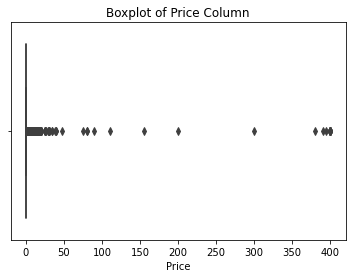

In [191]:
#sns.boxplot(inp0.Price);

sns.boxplot(x = inp0.Price).set(title = "Boxplot of Price Column");


#### Box plot for Reviews
o	Are there any apps with very high number of reviews? Do the values seem right?


In [192]:
inp0['Reviews'].describe()

count    1.082900e+04
mean     4.446031e+05
std      2.929213e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.102000e+03
75%      5.481500e+04
max      7.815831e+07
Name: Reviews, dtype: float64

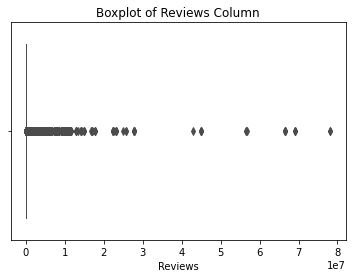

In [193]:
sns.boxplot(x = inp0.Reviews ,color='blue', linewidth= 1).set(title = "Boxplot of Reviews Column" );

# x - Horizontal Boxplot

In [194]:
min_value = inp0['Reviews'].min()
Q1 = inp0['Reviews'].quantile(0.25)
median_value = inp0['Reviews'].median()
Q3 = inp0['Reviews'].quantile(0.75)
max_value = inp0['Reviews'].max()


print ("min_value    :", min_value)
print ("Q1           :", Q1)
print ("median_value :", median_value)
print ("Q3           :", Q3)
print ("max_value    :", max_value)


min_value    : 0
Q1           : 38.0
median_value : 2102.0
Q3           : 54815.0
max_value    : 78158306


In [195]:
IQR = Q3 - Q1
IQR

54777.0

In [196]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# data points less than lower_limit are outliers
# data points greater than upper limit are outliers

print (lower_limit)
print (upper_limit)

-82127.5
136980.5


In [197]:
inp0.loc[inp0.Reviews <= lower_limit] # outliers

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### There is NO outlier from lower limit

Lets find the outliers higher than upper limit.. Our Upper limit after IQR calculation is 136980

In [198]:
inp0.Reviews.max() 

78158306

In [199]:
inp0.loc[inp0.Reviews >= upper_limit] # outliers

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39000.0,5000000,Free,0.0,Everyone,Art & Design,"August 3, 2018",2.2.5,4.0.3 and up
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31000.0,10000000,Free,0.0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,10000.0,10000000,Free,0.0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
45,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,4.7,174531,24000.0,10000000,Free,0.0,Everyone,Art & Design,"July 31, 2018",1.6.1,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10740,PhotoFunia,PHOTOGRAPHY,4.3,316378,4400.0,10000000,Free,0.0,Everyone,Photography,"June 3, 2017",4.0.7.0,2.3 and up
10781,Modern Strike Online,GAME,4.3,834117,44000.0,10000000,Free,0.0,Teen,Action,"July 30, 2018",1.25.4,4.1 and up
10784,Big Hunter,GAME,4.3,245455,84000.0,10000000,Free,0.0,Everyone 10+,Action,"May 31, 2018",2.8.6,4.0 and up
10809,Castle Clash: RPG War and Strategy FR,FAMILY,4.7,376223,24000.0,1000000,Free,0.0,Everyone,Strategy,"July 18, 2018",1.4.2,4.1 and up


In [200]:
inp0.Reviews[inp0.Reviews >= upper_limit].value_counts

<bound method IndexOpsMixin.value_counts of 3        215644
18       194216
19       224399
42       295221
45       174531
          ...  
10740    316378
10781    834117
10784    245455
10809    376223
10840    398307
Name: Reviews, Length: 1924, dtype: int32>

All 'Reviews' BoxPlot

in the results , In my opinion 
there are NO apps with very high number of reviews .
We already checked no apps that has more eviews than Installs. 
Some apps are more popular than others. 
Depend on Upper-limit almost 1924 apps' reviews more than upper-limit.
it is normal .These values seems correct and possible.


#### Histogram for Rating
o	How are the ratings distributed? Is it more toward higher ratings?


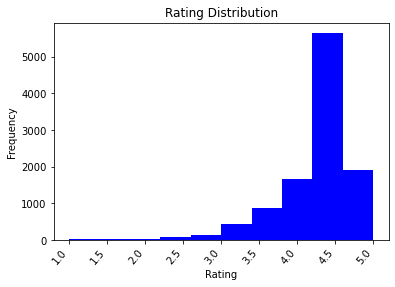

In [201]:
inp0.Rating.plot.hist(color='blue');
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.xticks(rotation=50, horizontalalignment="right");

Histogram says it Positive Distributed. 
it is more toward higher ratings.

<AxesSubplot:xlabel='Size', ylabel='Count'>

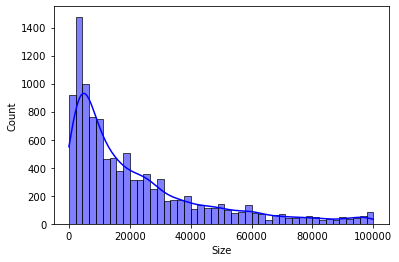

In [202]:
sns.histplot(data=inp0, x="Size", kde=True, color='blue')

## 6. Outlier treatment: 
1.	Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!
    a.	Check out the records with very high price
        i.	Is 200 indeed a high price?
    b.	Drop these as most seem to be junk apps
2.	Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.
3.	Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.
        a.	Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
        b.	Decide a threshold as cutoff for outlier and drop records having values more than that


#### 6.1.	Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!
    a.	Check out the records with very high price
        i.	Is 200 indeed a high price?
    b.	Drop these as most seem to be junk apps

In [203]:
inp0.Price[inp0.Price>=200]    # The Prices more than 200

4197    399.99
4362    399.99
4367    400.00
5351    399.99
5354    399.99
5355    299.99
5356    399.99
5357    379.99
5358    399.99
5359    399.99
5362    399.99
5364    399.99
5366    389.99
5369    399.99
5373    399.99
9719    200.00
9917    394.99
9934    399.99
Name: Price, dtype: float64

In [204]:
inp0.Price[inp0.Price>200].value_counts()

399.99    12
400.00     1
299.99     1
379.99     1
389.99     1
394.99     1
Name: Price, dtype: int64

We have totally 17 apps' Price more than 200 usd. 
I believe it looks like expensive we should drop these apps. You can see the below chart too.

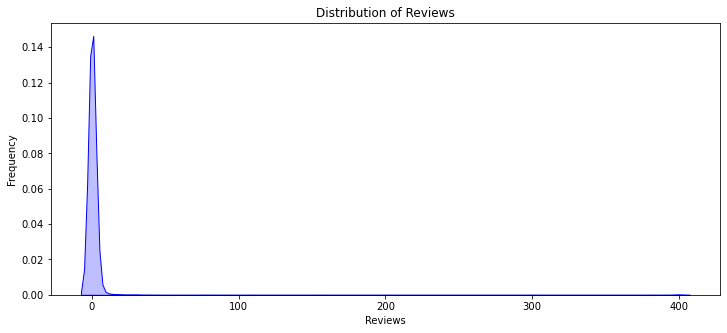

In [205]:
plt.figure(figsize=(12,5))
sns.kdeplot(x = inp0.Price,color = 'blue',shade = True)
plt.xlabel("Reviews")
plt.ylabel("Frequency")
plt.title('Distribution of Reviews');

#### 6.2	Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [206]:
inp0.Reviews[inp0.Reviews>=2000000]    # The Reviews more than 2M

139       2914724
335      56642847
336      69119316
338       9642995
340       4604324
           ...   
9166      2903386
9841      2339098
10186     7615646
10190     2721923
10327     5534114
Name: Reviews, Length: 453, dtype: int32

In [207]:
display(inp0.Reviews.describe())
display(inp0.Reviews.min())
display(inp0.Reviews.max())

count    1.082900e+04
mean     4.446031e+05
std      2.929213e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.102000e+03
75%      5.481500e+04
max      7.815831e+07
Name: Reviews, dtype: float64

0

78158306

In [208]:
reviews_df = inp0[['Reviews']]
reviews_df

,Reviews
0,159
1,967
2,87510
3,215644
4,967
...,...
10836,38
10837,4
10838,3
10839,114


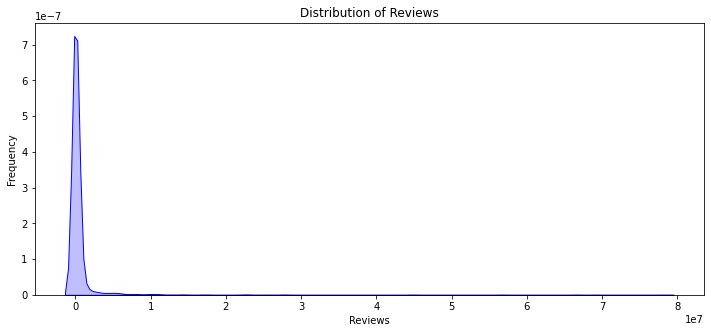

In [209]:
plt.figure(figsize=(12,5))
sns.kdeplot(x = reviews_df.Reviews,color = 'blue',shade = True)
plt.xlabel("Reviews")
plt.ylabel("Frequency")
plt.title('Distribution of Reviews');

In [210]:
inp0[inp0.Reviews>2000000]

# Please take note 335,336,338 index# . we wil check them after dropping

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,3100.0,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,35000.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,35000.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,17000.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,17000.0,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58000.0,100000000,Free,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
9841,Google Earth,TRAVEL_AND_LOCAL,4.3,2339098,63000.0,100000000,Free,0.0,Everyone,Travel & Local,"June 18, 2018",9.2.17.13,4.1 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000.0,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.0,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [211]:
# Dropping records having more than 2 million reviews.

inp0.drop(inp0[inp0['Reviews']>2000000].index)              

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9500.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,9500.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [212]:
# Let's be sure we dropped the the records 
# Index numbers 335,336,338 

inp0[330:340]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
330,Perfect Viewer,COMICS,4.4,51981,37000.0,5000000,Free,0.0,Everyone,Comics,"August 1, 2018",4.2.0.2,2.3 and up
331,"Best Wallpapers Backgrounds(100,000+ 4K HD)",COMICS,4.7,3596,7800.0,10000,Free,0.0,Teen,Comics,"June 16, 2018",1.01,4.0.3 and up
332,think Comics,COMICS,4.4,1006,19000.0,50000,Free,0.0,Everyone,Comics,"August 3, 2018",2.3.3,4.0.3 and up
333,Memes Button,COMICS,4.4,5968,5700.0,1000000,Free,0.0,Everyone,Comics,"May 28, 2018",1.4,4.0 and up
334,"Laftel - Watching and Announcing Snooping, Str...",COMICS,4.6,4895,35000.0,100000,Free,0.0,Everyone,Comics,"August 2, 2018",2.4.25,4.4 and up
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,35000.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,35000.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
337,Messenger for SMS,COMMUNICATION,4.3,125257,17000.0,10000000,Free,0.0,Teen,Communication,"June 6, 2018",1.8.9,4.1 and up
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,17000.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
339,Messenger Lite: Free Calls & Messages,COMMUNICATION,4.4,1429035,17000.0,100000000,Free,0.0,Everyone,Communication,"July 25, 2018",37.0.0.7.163,2.3 and up


#### 6.3	Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.
        a.	Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
        b.	Decide a threshold as cutoff for outlier and drop records having values more than that

Dropping very high Installs values

##### a.    Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

In [213]:
inp0.Installs.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10          100.0
0.25         5000.0
0.50       100000.0
0.70      1000000.0
0.90     10000000.0
0.95     50000000.0
0.99    500000000.0
Name: Installs, dtype: float64

Looks like there are just 1% apps having more than 100M installs. These apps might be genuine, but will definitely skew our analysis.  
We need to drop these.


In [214]:
len(inp0[inp0.Installs >= 100000000])

539

In [215]:
inp0.drop(inp0[inp0['Installs']>=100000000].index)              

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9500.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,9500.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## 7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

    1.	Make scatter plot/joinplot for Rating vs. Price
        a.	What pattern do you observe? Does rating increase with price?
    2.	Make scatter plot/joinplot for Rating vs. Size
        a.	Are heavier apps rated better?
    3.	Make scatter plot/joinplot for Rating vs. Reviews
        a.	Does more review mean a better rating always?
    4.	Make boxplot for Rating vs. Content Rating
        a.	Is there any difference in the ratings? Are some types liked better?
    5.	Make boxplot for Ratings vs. Category
        a.	Which genre has the best ratings?

### For each of the plots above, note down your observation.


#### 7.1.	Make scatter plot/joinplot for Rating vs Price
    a.	What pattern do you observe? Does rating increase with price?


<Figure size 864x360 with 0 Axes>

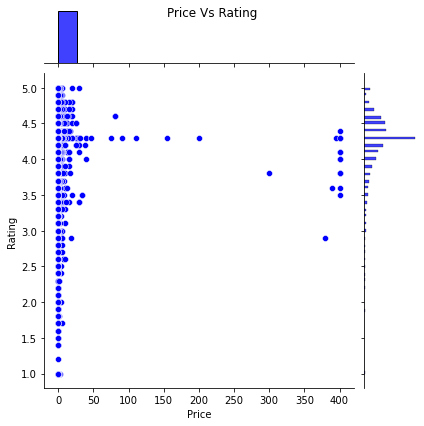

In [216]:
plt.figure(figsize=(12,5))
plot = sns.jointplot(x = inp0.Price, y = inp0.Rating, kind = 'scatter', color='blue');
plot.fig.suptitle("Price Vs Rating");

In [217]:
#sns.displot(data=inp0, x="Price", y="Rating")

Lets find the correlation between Price and Rating

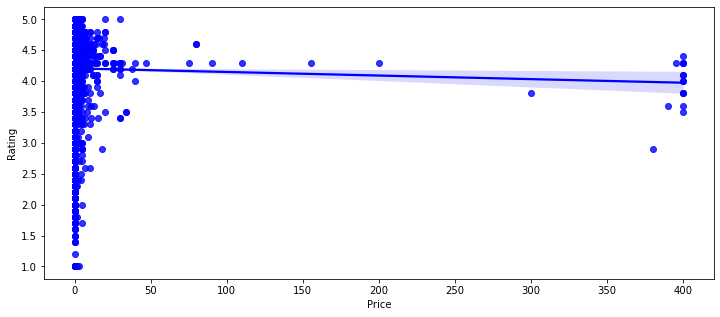

In [218]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.regplot(x=inp0["Price"], y=inp0["Rating"], color='blue') ;

In [219]:
inp0.Price.corr(inp0.Rating)
np.round(inp0.Price.corr(inp0.Rating),2)

-0.02

In [220]:
inp0.Rating.corr(inp0.Price)
np.round(inp0.Rating.corr(inp0.Price),2)

-0.02

##### According to Chart and Correlation = -0.02 
##### There is neither Positive nor Negative Corelation between Rating and Price
##### There is NO CORRELATION between them. This mean if The Price increases/decreases , it never affects the Rating. Or veice versa


#### 7.2	Make scatter plot/joinplot for Rating vs Size
     a.	Are heavier apps rated better?


<AxesSubplot:xlabel='Rating', ylabel='Size'>

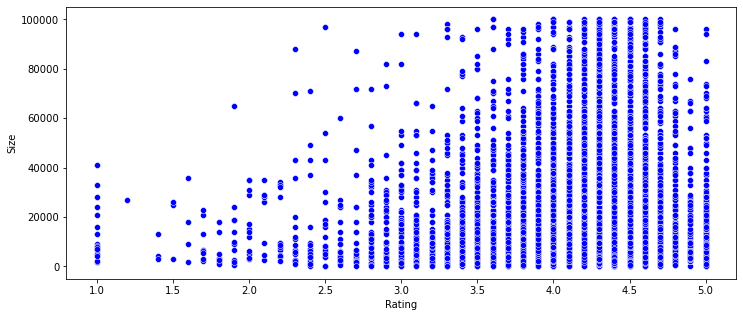

In [221]:
plt.figure(figsize=(12,5))
sns.scatterplot(x = inp0.Rating, y = inp0.Size, data=inp0 , color='blue')

#plot = sns.jointplot(x = inp0.Rating, y = inp0.Size, kind = 'scatter', color='red');
#plot.fig.suptitle("Rating Vs Size");

In [222]:
#  OPTIONAL : HEATMAP with CORRELATION

#inp0_corr=inp0.corr()
#sns.heatmap(inp0_corr, xticklabels= inp0_corr.columns, yticklabels=inp0_corr.columns, annot=True  ) ;
        

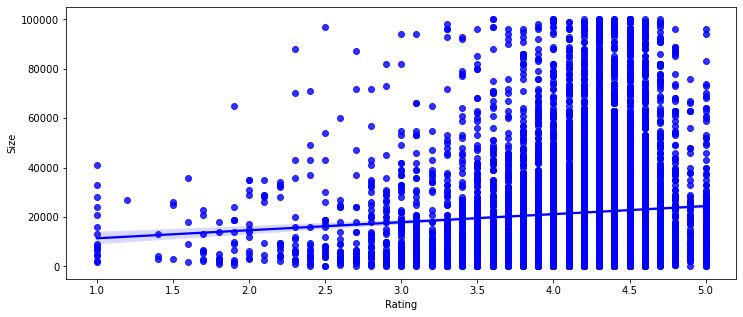

In [223]:
plt.figure(figsize=(12,5))
sns.regplot(x=inp0["Rating"], y=inp0["Size"], color='blue') ;

In [224]:
inp0.Rating.corr(inp0.Size)
np.round(inp0.Rating.corr(inp0.Size),2)

0.07

In [225]:
inp0.Size.corr(inp0.Rating)
np.round(inp0.Size.corr(inp0.Rating),2)

0.07

##### According to Chart and Correlation = 0.05
##### It looks like Positively correlated, but I can likely NO CORRELATION ( too low 0.05)


#### 7.3	Make scatter plot/joinplot for Rating vs Reviews
    a.Does more review mean a better rating always?

<Figure size 864x360 with 0 Axes>

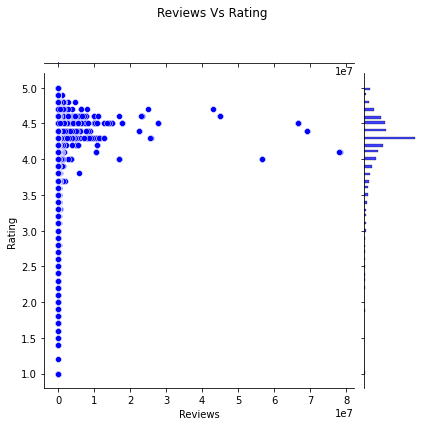

In [226]:
plt.figure(figsize=(12,5))
plot = sns.jointplot(x = inp0.Reviews, y = inp0.Rating, kind = 'scatter', color='blue');
plot.fig.suptitle("Reviews Vs Rating");

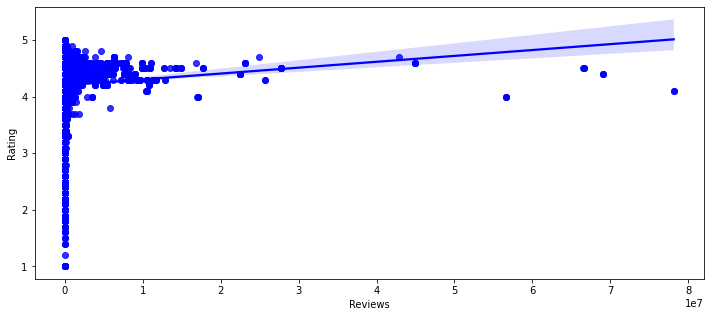

In [227]:
plt.figure(figsize=(12,5))
sns.regplot(x=inp0["Reviews"], y=inp0["Rating"],color='blue') ;

In [228]:
inp0.Reviews.corr(inp0.Rating)
np.round(inp0.Reviews.corr(inp0.Rating),2)

0.06

In [229]:
inp0.Rating.corr(inp0.Reviews)
np.round(inp0.Rating.corr(inp0.Reviews),2)

0.06

##### According to Chart and Correlation = 0.13
##### it is Positively correlated, but not strong .We can say  more review mean a better rating rarely

#### 7.4	Make boxplot for Rating vs Content Rating
    a.	Is there any difference in the ratings? Are some types liked better?

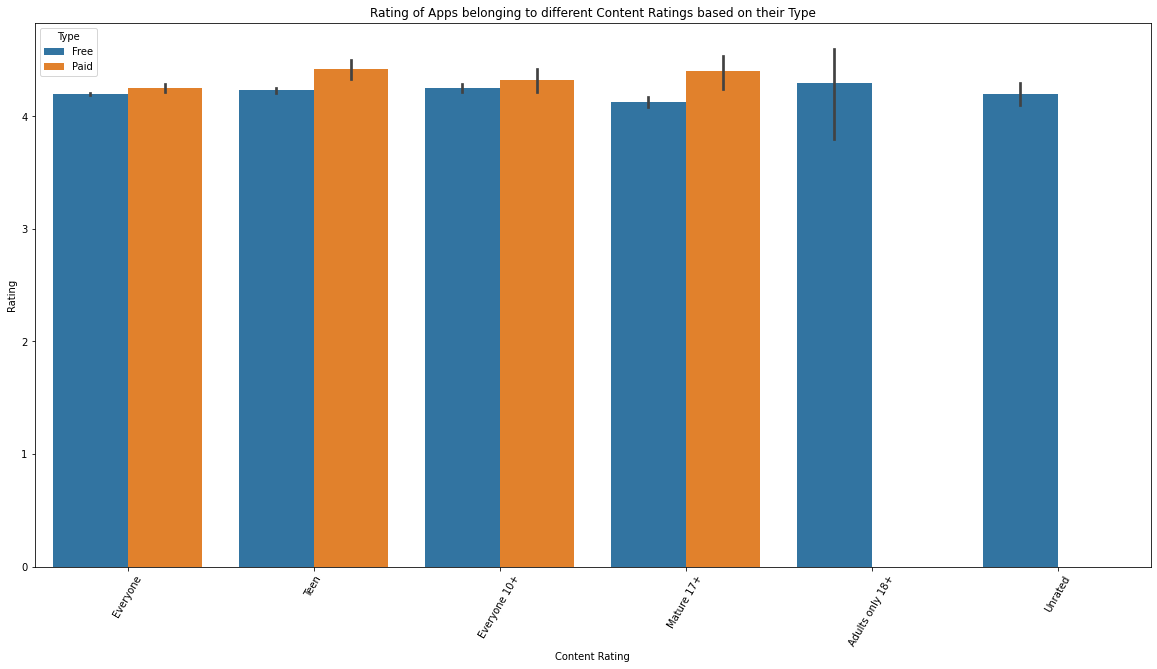

In [230]:
# plotting in the graph
plt.figure(figsize=(20,10))
plt.xticks(rotation=60)
plt.xlabel('Content Rating')
plt.ylabel('Rating')
sns.barplot(data= inp0, x= 'Content Rating', y= 'Rating',hue='Type')
plt.title('Rating of Apps belonging to different Content Ratings based on their Type');

 There is NOT MUCH difference in the ratings. PAID types liked better and most

#### 7.5	Make boxplot for Ratings vs. Category
    a.	Which genre has the best ratings?

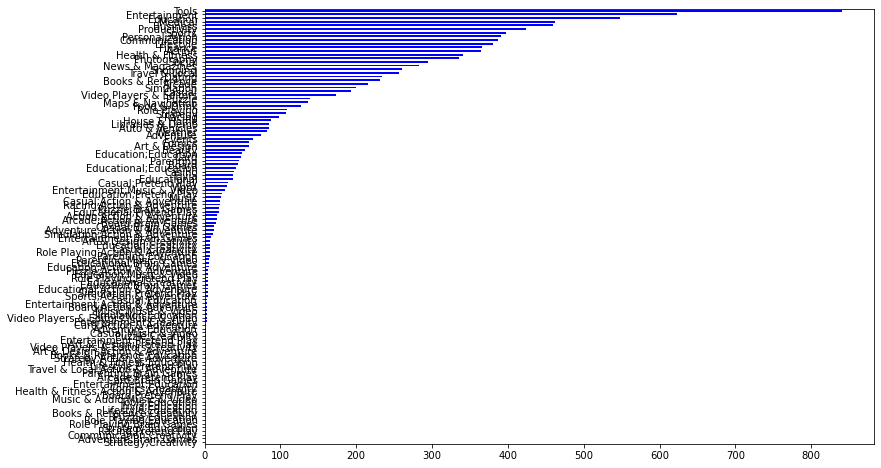

In [231]:
# Genres Ascending in Data

inp0.Genres.value_counts().sort_values(ascending=True).plot(kind='barh',figsize= (12,8), color='blue');
#inp0.groupby('Genres').size().sort_values(ascending=False)

##### Insight : Lets find the max rating and count the Apps that has max rating

In [232]:
print('Maximum Rating (from 1 to 5) is ; ' ,inp0.Rating.max())

Maximum Rating (from 1 to 5) is ;  5.0


There are 5-Rating Apps. Lets count how many there are

In [233]:
print('No of Apps with Full Ratings; ',inp0.Rating[inp0['Rating']==5].count())

No of Apps with Full Ratings;  268


Genres with Maximum Rating

In [234]:
BestGenreRate = inp0.groupby('Genres')[['Rating']].max()
BestGenreRate

,Rating
Genres,
Action,5.0
Action;Action & Adventure,4.6
Adventure,4.7
Adventure;Action & Adventure,4.5
Adventure;Brain Games,4.6
...,...
Video Players & Editors,4.9
Video Players & Editors;Creativity,4.1
Video Players & Editors;Music & Video,4.0


In [235]:
# ANOTHER WAY with Top of GENRES

#BestGenreRate=inp0.groupby(['Rating']).apply(lambda x: x.sort_values(['Genres'],ascending=False).head(2).drop('Rating', axis=1))
#print(BestGenreRate)

In [236]:
# ANOTHER WAY with Top of Genres
#BestGenreRate=inp0.sort_values(['Genres','Rating'], ascending=False).groupby('Genres').head(2)
#BestGenreRate=inp0.sort_values(['Genres','Rating'], ascending=False).groupby('Rating').head(2)
#print(BestGenreRate)

## 8 Data preprocessing
For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.
1.	Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.
2.	Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.
3.	Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.


**Making a copy of the dataset**

In [237]:
inp1=inp0

In [238]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [239]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int32  
 4   Size            10829 non-null  float64
 5   Installs        10829 non-null  int64  
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  float64
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10821 non-null  object 
 12  Android Ver     10827 non-null  object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 1.4+ MB


#### 8.1	Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [240]:
Reviews1 = np.log1p(inp1['Reviews'])
inp1['Reviews'] = Reviews1

Installs1 = np.log1p(inp1['Installs'])
inp1['Installs'] = Installs1


#### 8.2	Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [241]:
unneeded_columns= ['Last Updated', 'Current Ver', 'Android Ver']
inp1= inp1.drop(unneeded_columns, axis=1)
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000.0,17.727534,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,3.663562,53000.0,8.517393,Free,0.0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,1.609438,3600.0,4.615121,Free,0.0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,4.3,1.386294,9500.0,6.908755,Free,0.0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,4.744932,9500.0,6.908755,Free,0.0,Mature 17+,Books & Reference


In [242]:
inp1.shape

(10829, 10)

#### 8.3	Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

Getting dummy variables for Category, Genres, Content Rating

In [243]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
dtype: object

In [244]:
inp2=inp1

#### Lets apply Dummy Encoding on Column' Category'

In [245]:
#get unique values in 'Category' Column

inp2.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [246]:
inp2.Category = pd.Categorical(inp2.Category)

x = inp2[['Category']]
del inp2['Category']

dummies = pd.get_dummies(x, prefix = 'Category')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_ART_AND_DESIGN,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,1,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,1,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design,1,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,12.281389,25000.0,17.727534,Free,0.0,Teen,Art & Design,1,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity,1,...,0,0,0,0,0,0,0,0,0,0


In [247]:
inp2.shape

(10829, 42)

#### Lets apply Dummy Encoding on Column' Genres'

In [248]:
#get unique values in 'Category' Column

inp2['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

##### => So There are too many categories under Genres. So, we want to reduce some categories which have very few samples under them ##### and put them under one new common category i.e. "Others".

In [249]:
lists = []
for i in inp2.Genres.value_counts().index:
    if inp2.Genres.value_counts()[i]<20:
        lists.append(i)
inp2.Genres = ['Other' if i in lists else i for i in inp2.Genres] 

In [250]:
inp2["Genres"].unique()

array(['Art & Design', 'Other', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education;Education', 'Education',
       'Education;Pretend Play', 'Entertainment',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Arcade', 'Casual', 'Card', 'Casual;Pretend Play',
       'Action', 'Strategy', 'Puzzle', 'Sports', 'Music', 'Word',
       'Racing', 'Casual;Action & Adventure', 'Simulation', 'Adventure',
       'Board', 'Trivia', 'Role Playing', 'Educational;Education',
       'Racing;Action & Adventure', 'Medical', 'Social', 'Shopping',
       'Photography', 'Travel & Local', 'Tools', 'Personalization',
       'Productivity', 'Parenting', 'Weather', 'Video Players & Editors',
       'News & Magazines', 'Maps & Navigation', 'Educational', 'Casino'],
      dtype=object)

In [251]:
inp2.Genres = pd.Categorical(inp2.Genres)

x = inp2[['Genres']]
del inp2['Genres']

dummies = pd.get_dummies(x, prefix = 'Genres')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,1,0,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,12.281389,25000.0,17.727534,Free,0.0,Teen,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,1,0,...,0,0,0,0,0,0,0,0,0,0


In [252]:
inp2.head(5)

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,1,0,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,12.281389,25000.0,17.727534,Free,0.0,Teen,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,1,0,...,0,0,0,0,0,0,0,0,0,0


In [253]:
inp2.shape 

(10829, 96)

#### Lets apply Dummy Encoding on Content Rating'

In [254]:
#get unique values in Column "Content Rating"
inp2["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [255]:
inp2['Content Rating'] = pd.Categorical(inp2['Content Rating'])

x = inp2[['Content Rating']]
del inp2['Content Rating']

dummies = pd.get_dummies(x, prefix = 'Content Rating')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,5.075174,19000.0,9.210440,Free,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Coloring book moana,3.9,6.875232,14000.0,13.122365,Free,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,11.379520,8700.0,15.424949,Free,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Sketch - Draw & Paint,4.5,12.281389,25000.0,17.727534,Free,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,4.3,6.875232,2800.0,11.512935,Free,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [256]:
inp2.shape

(10829, 101)

In [257]:
inp2.columns

Index(['App', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY',
       ...
       'Genres_Trivia', 'Genres_Video Players & Editors', 'Genres_Weather',
       'Genres_Word', 'Content Rating_Adults only 18+',
       'Content Rating_Everyone', 'Content Rating_Everyone 10+',
       'Content Rating_Mature 17+', 'Content Rating_Teen',
       'Content Rating_Unrated'],
      dtype='object', length=101)

In [258]:
inp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Columns: 101 entries, App to Content Rating_Unrated
dtypes: float64(5), object(2), uint8(94)
memory usage: 1.9+ MB


## 9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

### I want to test and train 'Installs' and 'Revies' to predict ' Rating'

In [259]:
x= inp2.loc[:, ['Installs', 'Reviews']].values
y=inp2['Rating']
print(x)






#ANOTHER OPTION
#I could make the predict of  all columns ,but it will make too load on the data prediction
#x=inp2.drop(['Rating', 'App', 'Type'], axis =1)
#y = inp2['Rating']

[[ 9.21044037  5.07517382]
 [13.12236538  6.87523209]
 [15.42494867 11.37951978]
 ...
 [ 6.90875478  1.38629436]
 [ 6.90875478  4.74493213]
 [16.11809575 12.89498085]]


##### Algorithm

In [260]:
import sklearn.linear_model as lm
reg = lm.LinearRegression()

## 10. Separate the dataframes into X_train, y_train, X_test, and y_test.

##### Data Split

In [261]:
import sklearn.model_selection as ms
x_train,x_test, y_train, y_test = ms.train_test_split(x, y , test_size=0.3 , random_state=0)



## 11 . Model building
## 12.  Make predictions on test set and report R2

-	Use linear regression as the technique
-	Report the R2 on the train set


##### Training the Data ( Fitting )

In [262]:
reg.fit(x_train , y_train)

LinearRegression()

#####  Predicting

In [263]:
y_pred=reg.predict(x_test)

print (' Install and Reviews :', x_test )

print ( ' Predicted Rating : ', y_pred)

 Install and Reviews : [[ 1.79175947  0.        ]
 [17.72753358 14.17489543]
 [ 9.21044037  6.15273269]
 ...
 [13.12236538  8.66319649]
 [13.81551156  8.00770001]
 [ 4.61512052  3.63758616]]
 Predicted Rating :  [4.3265901  4.33850509 4.2761142  ... 4.15734972 3.99815359 4.4701032 ]


##### Scoring - R2

In [264]:
import sklearn.metrics as mt
score=mt.r2_score (y_test, y_pred)

print("The R2 value of the Training Set is : {}".format(score))

The R2 value of the Training Set is : 0.08284303774576296


### ----------------------------------------------------------------------------